# Density-Based Spatial Clustering of Applications with Noise

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based unsupervised learning algorithm. It computes nearest neighbor graphs to find arbitrary-shaped clusters and outliers. Whereas the K-means clustering generates spherical-shaped clusters. 

DBSCAN does not require K clusters initially. Instead, it requires two parameters: eps and minPts.

* eps: it is the radius of specific neighborhoods. If the distance between two points is less than or equal to esp, it will be considered its neighbors.
* minPts: minimum number of data points in a given neighborhood to form the clusters. <br>
DBSCAN uses these two parameters to define a core point, border point, or outlier.

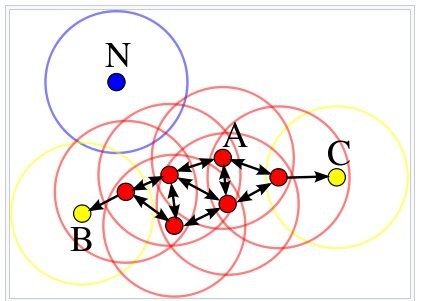

In [37]:
from IPython.display import Image
Image("5.jpg")

## How does the DBSCAN clustering algorithm work?
 

1. Randomly selecting any point p. It is also called core point if there are more data points than minPts in a neighborhood. 
2. It will use eps and minPts to identify all density reachable points.
3. It will create a cluster using eps and minPts if p is a core point. 
4. It will move to the next data point if p is a border point. A data point is called a border point if it has fewer points than minPts in the neighborhood. 
5. The algorithm will continue until all points are visited.

## Why we need DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is useful in situations where the clusters have irregular shapes and densities, and where the number of clusters is not known in advance. Here are some reasons why DBSCAN is useful:

1. <b>Handling clusters of arbitrary shape:</b> DBSCAN can identify clusters of any shape, unlike some other clustering algorithms such as K-means or hierarchical clustering, which assume clusters to be convex or have specific structures. DBSCAN can handle clusters that are non-linear, have varying densities, or have complex shapes.

2. <b>Robust to noise and outliers:</b> DBSCAN is robust to noise and outliers in the data. It can identify and mark data points as noise, allowing for the detection of meaningful clusters even in the presence of outliers.

3. <b>Automatic determination of the number of clusters:</b> DBSCAN does not require specifying the number of clusters in advance. It uses the concepts of density and connectivity to automatically determine the number of clusters based on the characteristics of the data.

4. <b>Ability to handle different density regions:</b> DBSCAN can identify clusters in different density regions. It can detect dense regions as well as sparser regions, allowing for the discovery of clusters with varying densities.

5. <b>Efficiency for large datasets:</b> DBSCAN's efficiency is not highly dependent on the size of the dataset. It can efficiently process large datasets and scale well to handle millions of data points.

Overall, DBSCAN is a flexible and powerful clustering algorithm that can handle complex data structures and provides robust clustering results in various scenarios.

### Compute Required parameters for DBSCAN Clustering

DBSCAN requires `ε` and `minPts` parameters for clustering. The minPts parameter is easy to set. The minPts should be 4 for two-dimensional dataset. For multidimensional dataset, minPts should be `2 * number of dimensions`. For example, if your dataset has 6 features, set `minPts = 12`. Sometimes, domain expertise is also required to set a minPts parameter.
<br><br>
Another question is what optimal value should be used for the `ε` parameter. The `ε` parameter is difficult to set and depends on the distance function. Sometimes, domain expertise is also required to set a `ε` parameter. The ε should be as small as possible.
<br><br>
To determine the optimal `ε` parameter, I will compute the k-nearest neighbor (kNN) distances (average distance of every data point to its k-nearest neighbors) of an input dataset using the k-nearest neighbor method (unsupervised nearest neighbors learning).

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [15]:
df = pd.read_csv('Mall_Customers.csv')
X_train = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 


In [17]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

,Cluster
0,112
2,34
3,24
-1,18
1,8
4,4


In [18]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

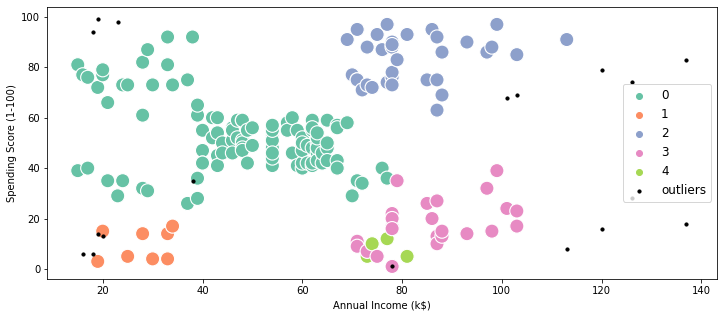

In [23]:
plt.figure(figsize=(12, 5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set2', legend='full', s=200)

plt.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
plt.legend(fontsize='12')
plt.show()

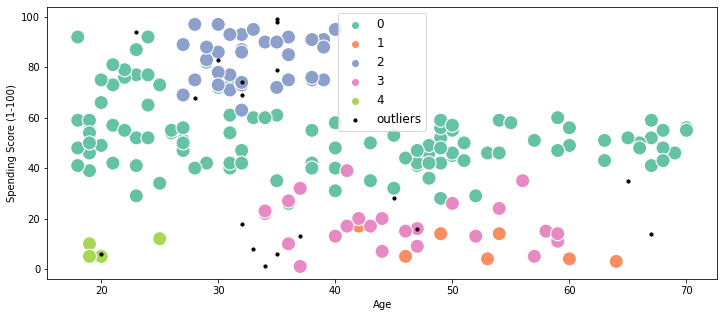

In [24]:
plt.figure(figsize=(12, 5))
sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1],
                hue='Cluster', palette='Set2', legend='full', s=200)

plt.scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=10, label='outliers', c="k")
plt.legend(fontsize='12')
plt.show()


In [25]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
df.head(2)

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398


In [26]:
print(df.shape)

(4406, 2)


In [27]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
neigh_dist, neigh_ind = nbrs.kneighbors(df)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

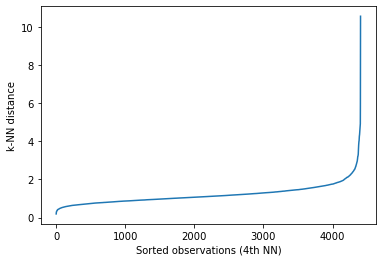

In [28]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In the k-NN distance plot, you should look for the `“knee”` or `“elbow”` point (a threshold value where you see a sharp change) of the curve to find the optimal value of `ε`.

In [30]:
!pip install kneed

In [31]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)


4.5445133515748894


We will use `4.54` as optimum value of `ε` for DBSCAN clustering

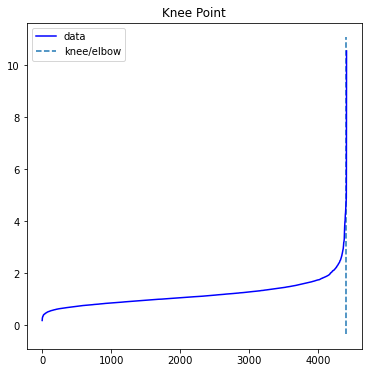

In [32]:
kneedle.plot_knee()
plt.show()

In [33]:
from sklearn.cluster import DBSCAN# 2* 2
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
# get cluster labels
clusters.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
set(clusters.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [35]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 870,
         1: 1524,
         2: 769,
         3: 301,
         4: 153,
         5: 246,
         6: 232,
         7: 283,
         8: 11,
         9: 6,
         10: 8,
         -1: 3})

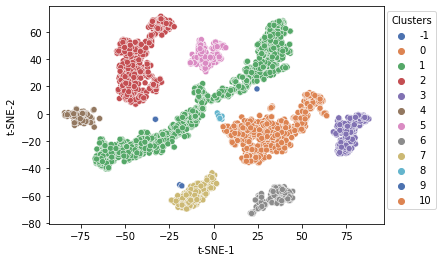

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()